# Generating Keypoints and Descriptors

# Ex1. Harris corner and SIFT keypoint detector

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE1 = "../testimages/wall1.jpg"
IMAGE2 = "../testimages/wall2.jpg"
img1 = cv2.imread(IMAGE1)
img2 = cv2.imread(IMAGE2)

In [3]:
# Convert images to grayscale
gimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [4]:
sift = cv2.SIFT_create()
keypoints1, descr1 = sift.detectAndCompute(gimg1, None)
keypoints2, descr2 = sift.detectAndCompute(gimg2, None)
print(len(keypoints1), len(keypoints2))
print(descr1.shape, descr2.shape)
descr1, descr2

3517 3933
(3517, 128) (3933, 128)


(array([[  8.,  84.,  49., ...,  62.,   1.,   1.],
        [ 78.,  71.,   0., ...,   0.,   0.,   0.],
        [  9., 102.,  18., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   4.,  22.,  34.],
        [  0.,   1.,  70., ...,   8.,  35.,  45.],
        [  0.,   0.,   0., ...,  33.,  19.,   0.]], dtype=float32),
 array([[48.,  4.,  4., ...,  0.,  0.,  0.],
        [13.,  4.,  3., ...,  0.,  0.,  1.],
        [ 3.,  3., 12., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  2.,  5., ..., 17.,  0.,  0.],
        [ 0.,  0.,  0., ...,  2.,  0.,  0.]], dtype=float32))

In [5]:
keypoints1_coords = np.array([kp.pt for kp in keypoints1]).T
keypoints2_coords = np.array([kp.pt for kp in keypoints2]).T
keypoints1_coords, keypoints2_coords

(array([[  3.1443665 ,   3.19970465,   3.19970465, ..., 796.68511963,
         796.68902588, 796.85296631],
        [ 75.43362427, 597.7232666 , 597.7232666 , ...,  75.49627686,
         616.10949707,  78.84636688]]),
 array([[  2.86175275,   2.95542789,   3.67320895, ..., 796.39935303,
         796.57574463, 796.97558594],
        [495.28283691, 249.09713745, 564.9498291 , ..., 437.03552246,
         290.45672607, 441.18200684]]))

In [6]:
# Harris corner detection
thresh = 1000  # Number of top corners to keep
corners1 = cv2.goodFeaturesToTrack(gimg1, maxCorners=thresh, qualityLevel=0.01, minDistance=10)
corners2 = cv2.goodFeaturesToTrack(gimg2, maxCorners=thresh, qualityLevel=0.01, minDistance=10)

In [7]:
corners1 = corners1.reshape(-1, 2).T  # Convert to 2D array for plotting
corners2 = corners2.reshape(-1, 2).T  # Convert to 2D array for plotting

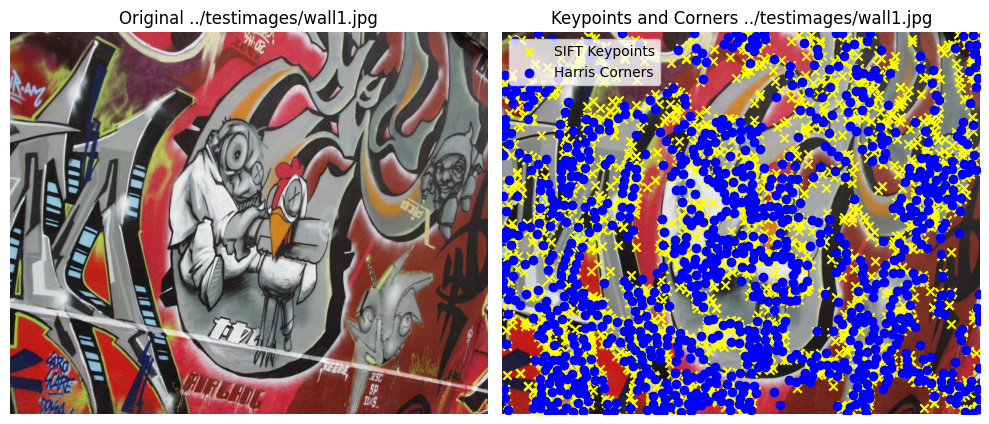

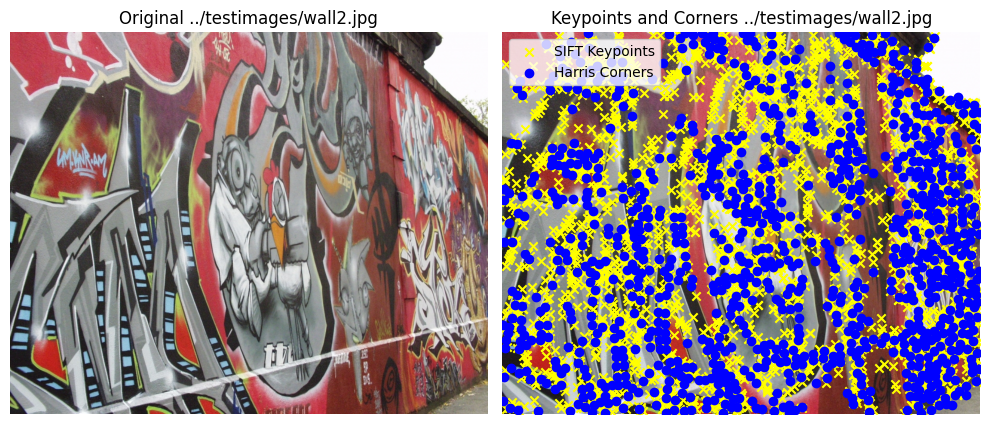

In [8]:
# Plot original image and keypoints side by side for image 1
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Plot the original image
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'Original {IMAGE1}')
axes[0].axis('off')

# Plot the keypoints and corners image
axes[1].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[1].scatter(keypoints1_coords[0], keypoints1_coords[1], color='yellow', marker='x', label='SIFT Keypoints')
axes[1].scatter(corners1[0], corners1[1], color='blue', marker='o', label='Harris Corners')
axes[1].set_title(f'Keypoints and Corners {IMAGE1}')
axes[1].axis('off')
axes[1].legend()

plt.tight_layout()

# Plot original image and keypoints side by side for image 2
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Plot the original image
axes[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'Original {IMAGE2}')
axes[0].axis('off')

# Plot the keypoints and corners image
axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].scatter(keypoints2_coords[0], keypoints2_coords[1], color='yellow', marker='x', label='SIFT Keypoints')
axes[1].scatter(corners2[0], corners2[1], color='blue', marker='o', label='Harris Corners')
axes[1].set_title(f'Keypoints and Corners {IMAGE2}')
axes[1].axis('off')
axes[1].legend()

plt.tight_layout()
plt.show()

In [116]:
np.savez('siftresults.npz', keypoints1=keypoints1_coords, keypoints2=keypoints2_coords, descr1=descr1, descr2=descr2)

# Ex2. SIFT descriptor matching

In [9]:
sift_data = np.load('siftresults.npz')
keypoints1 = sift_data['keypoints1']
keypoints2 = sift_data['keypoints2']
descr1 = sift_data['descr1']
descr2 = sift_data['descr2']
print(f"Descriptor 1 shape: {descr1.shape}, type: {descr1.dtype}")
print(f"Descriptor 2 shape: {descr2.shape}, type: {descr2.dtype}")
print(f"Keypoints 1 shape: {keypoints1.shape}, type: {keypoints1.dtype}")
print(f"Keypoints 2 shape: {keypoints2.shape}, type: {keypoints2.dtype}")


Descriptor 1 shape: (3517, 128), type: float32
Descriptor 2 shape: (3933, 128), type: float32


In [10]:
# Match the SIFT features between images using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descr1, descr2)
matches = sorted(matches, key=lambda x: x.distance)

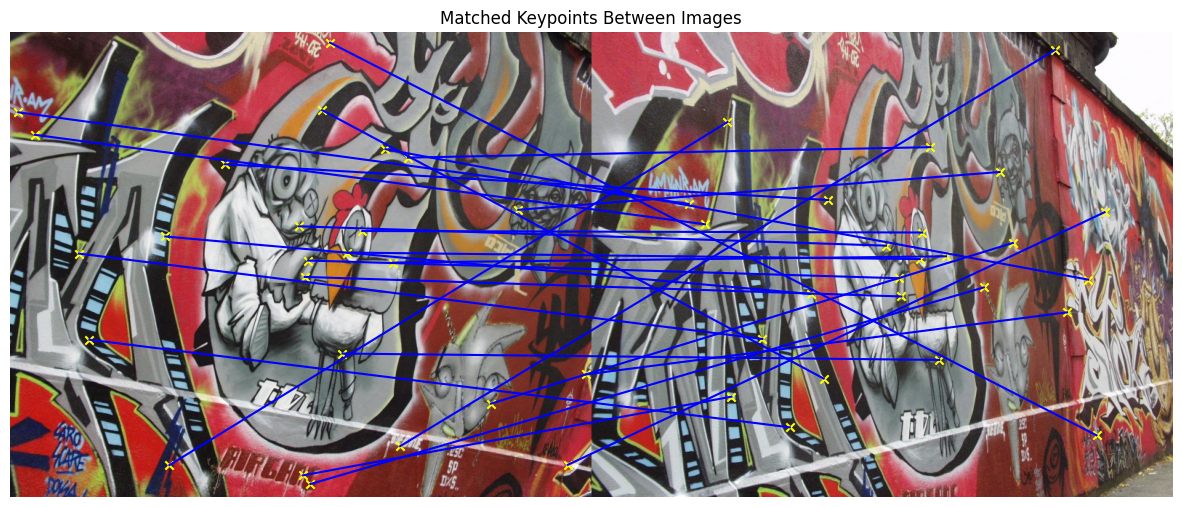

In [120]:
bothimages = np.hstack((img1, img2))
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(bothimages, cv2.COLOR_BGR2RGB))
plt.title('Matched Keypoints Between Images')
image2offset = img1.shape[1]  # Width of the first image
STEPSIZE = 50  # Draw 1 in 50 matches
for i in range(0, len(matches), STEPSIZE):
    m = matches[i]
    img1_idx = m.queryIdx
    img2_idx = m.trainIdx

    # Coordinates of the matched keypoints
    img1x, img1y = keypoints1[:, img1_idx]
    img2x, img2y = keypoints2[:, img2_idx] + [image2offset, 0]

    # Plot matched keypoints and lines between them
    plt.plot([img1x, img2x], [img1y, img2y], 'b-')
    plt.scatter([img1x, img2x], [img1y, img2y], c='yellow', marker='x')

plt.axis('off')
plt.show()

# K-means Clustering

In [179]:
import numpy as numpy
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [199]:
# Parameters
RANGE = 100
NCLUSTERS = 5
SPREAD = 5
NPOINTS = 100
DIMENSION = 2  # Plotting will only work if this is 2

In [200]:
# 1) Generate NCLUSTERS of synthetic data
data = []
for n in range(NCLUSTERS):
    cluster_mean = (np.random.rand(DIMENSION) - np.random.rand(DIMENSION)) * RANGE
    cluster_data = np.random.randn(DIMENSION, NPOINTS) * SPREAD + cluster_mean[:, np.newaxis]
    data.append(cluster_data)
for i, cluster in enumerate(data):
    print(f"Shape of cluster {i + 1}: {cluster.shape}")

Shape of cluster 1: (2, 100)
Shape of cluster 2: (2, 100)
Shape of cluster 3: (2, 100)
Shape of cluster 4: (2, 100)
Shape of cluster 5: (2, 100)


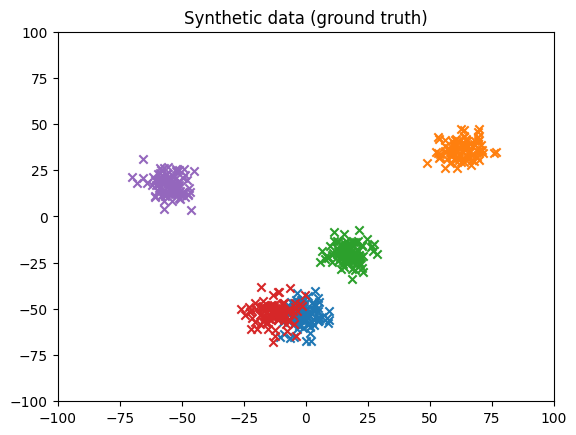

In [201]:
# 2) Plot data - this is the "ground truth" we hope k-means can recover
plt.figure()
plt.title('Synthetic data (ground truth)')
plt.xlim(-RANGE, RANGE)
plt.ylim(-RANGE, RANGE)
for cluster_data in data:
    plt.scatter(cluster_data[0, :], cluster_data[1, :], marker='x')
plt.show()

In [202]:
# 3) Concatenate all the data
alldata = np.hstack(data)
print(f"Shape of alldata: {alldata.shape}")

Shape of alldata: (2, 500)


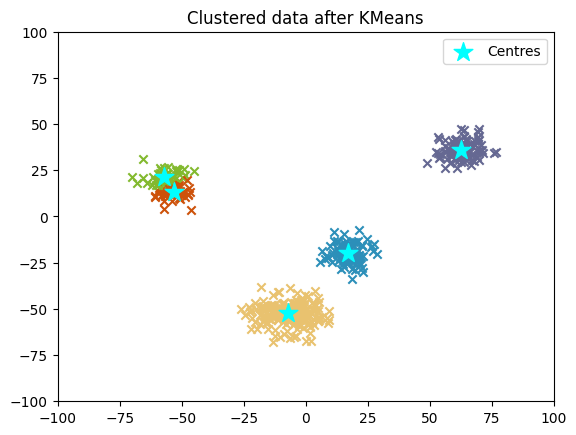

In [209]:
# 4) Run KMeans and plot the centers of the identified clusters
# Random initial cluster centers
starting_centres = np.random.rand(NCLUSTERS, DIMENSION) * RANGE - (RANGE / 2)

# Implementing KMeans manually (you can use sklearn's KMeans for simplicity)
def kmeans(data, k, init_centres, max_iters=100):
    centres = init_centres.copy()
    for _ in range(max_iters):
        # Assign points to nearest centre
        distances = cdist(data.T, centres)
        labels = np.argmin(distances, axis=1)
        
        # Update centres
        new_centres = np.array([data[:, labels == i].mean(axis=1) if np.any(labels == i) else centres[i] for i in range(k)])
        
        # Check for convergence
        if np.allclose(new_centres, centres):
            break
        centres = new_centres
    return centres, labels

centres, labels = kmeans(alldata, NCLUSTERS, starting_centres)

plt.figure()
plt.title('Clustered data after KMeans')
plt.xlim(-RANGE, RANGE)
plt.ylim(-RANGE, RANGE)

colours = np.random.rand(NCLUSTERS, 3)
for i, point in enumerate(alldata.T):
    plt.scatter(point[0], point[1], color=colours[labels[i]], marker='x')

# Plot the cluster centers
plt.scatter(centres[:, 0], centres[:, 1], color='cyan', marker='*', s=200, label='Centres')
plt.legend()
plt.show()

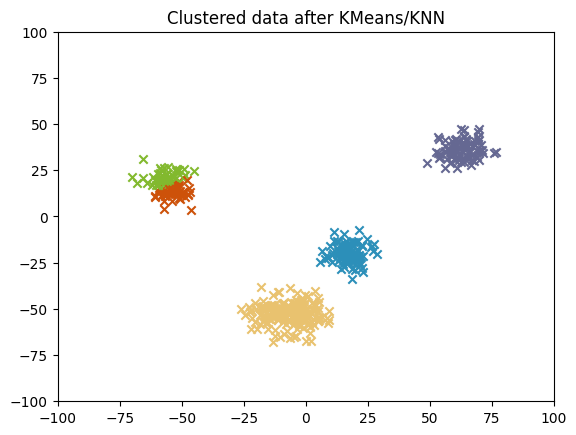

In [211]:
# 5) Make a nearest neighbour assignment (manual KNN-like step)
all_dists = np.array([np.linalg.norm(alldata - centre[:, np.newaxis], axis=0) for centre in centres])
classification = np.argmin(all_dists, axis=0)

# 6) Plot the assignments
plt.figure()
plt.title('Clustered data after KMeans/KNN')
plt.xlim(-RANGE, RANGE)
plt.ylim(-RANGE, RANGE)
for i, point in enumerate(alldata.T):
    plt.scatter(point[0], point[1], color=colours[classification[i]], marker='x')
plt.show()

In [213]:
# Print the number of points in each cluster before KMeans (ground truth)
groundtruth = np.concatenate([np.ones(NPOINTS) * (i + 1) for i in range(NCLUSTERS)])
unique, counts = np.unique(groundtruth, return_counts=True)
print("Number of points in each class (ground truth):")
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} points")
# Print the number of points in each cluster after KMeans (classification result)
unique, counts = np.unique(classification, return_counts=True)
print("\nNumber of points in each class (after KMeans):")
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} points")

Number of points in each class (ground truth):
Class 1: 100 points
Class 2: 100 points
Class 3: 100 points
Class 4: 100 points
Class 5: 100 points

Number of points in each class (after KMeans):
Class 0: 100 points
Class 1: 51 points
Class 2: 100 points
Class 3: 200 points
Class 4: 49 points


# 7) Check the ground truth
groundtruth = np.concatenate([np.ones(NPOINTS) * i for i in range(NCLUSTERS)])
correct_matches = np.sum(groundtruth == classification)
print(f'Number of correct classifications: {correct_matches} / {alldata.shape[1]}')